# تمرین ۳ .اعمال فیلتر در دامنه فرکانس
## بخش ب

### Import Liberaries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Read and Show Origianl Image

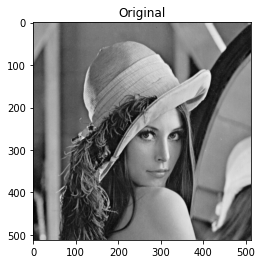

In [2]:
lena = cv2.imread('lena512.bmp', cv2.IMREAD_GRAYSCALE).astype('float64')
plt.imshow(lena, cmap='gray')
plt.title('Original')
plt.show()

### Calculate fft2 of Original Image

In [3]:
lena_freq = np.fft.fft2(lena)

### Create Circular Filter

In [4]:
center = (int(lena.shape[0] / 2), int(lena.shape[1] / 2))
Y, X = np.ogrid[:lena.shape[0], :lena.shape[1]]
dist_from_center = np.sqrt((Y - center[0]) ** 2 + (X - center[1]) ** 2)

### Apply Circular Masks to The Image
### Calculate PSNR and Show Results

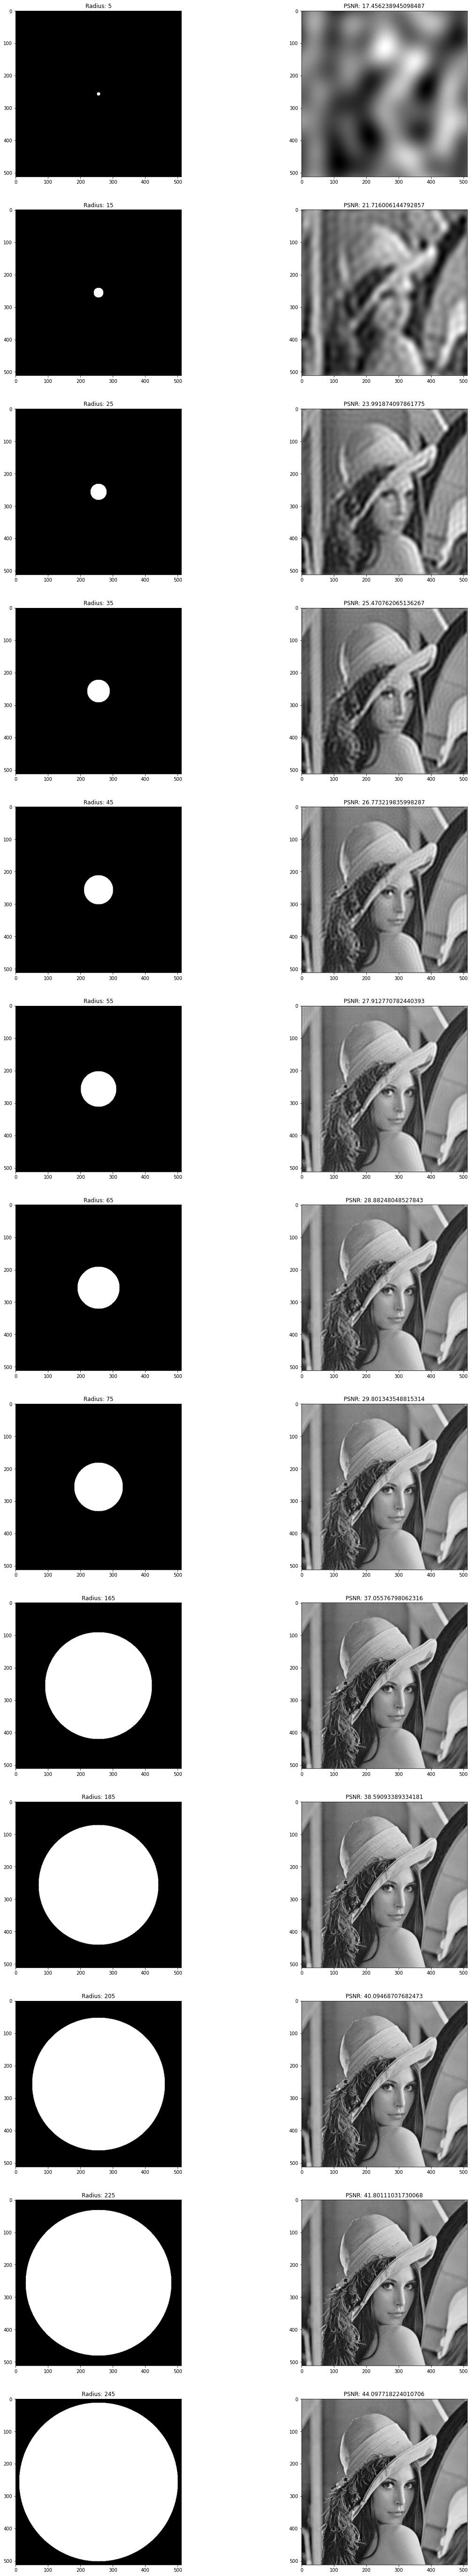

In [5]:
stp = 20
_, subplt = plt.subplots(int(lena.shape[0] / 2 / stp) + 1, 2, figsize=(20, 100))
for i in range(5, int(lena.shape[0] / 2), stp):
    index = int(i / stp)
    midIndex = np.ceil(int(lena.shape[0]) / stp / 4)
    radius = i
    if index <= midIndex:
        radius -= index * int(stp / 2)
    mask = dist_from_center <= radius
    subplt[index][0].imshow(mask, cmap='gray')
    subplt[index][0].title.set_text(f"Radius: {radius}")
    mask = np.fft.fftshift(mask)
    result = np.fft.ifft2(lena_freq * mask)
    result = np.absolute(result)
    subplt[index][1].imshow(result, cmap='gray')
    subplt[index][1].title.set_text(f"PSNR: {cv2.PSNR(lena, result)}")
plt.show()

به وضوح مشاهده می شود با بزرگ تر شده شعاع دایره فیلتر وضوح تصویر نیز بیشتر می شود و عدد پی اس ان آر نیز با افزایش شعاع به طور محسوسی تغییر می کند و بزرگ تر می شود
تنها موردی که در این روش وجود دارد موجی شدن تصویر است که باعث می شود برای چشم انسان کیفیت کم تر به نظر برسد

### Apply Circular Gaussian Masks to The Image
### Calculate PSNR and Show Results

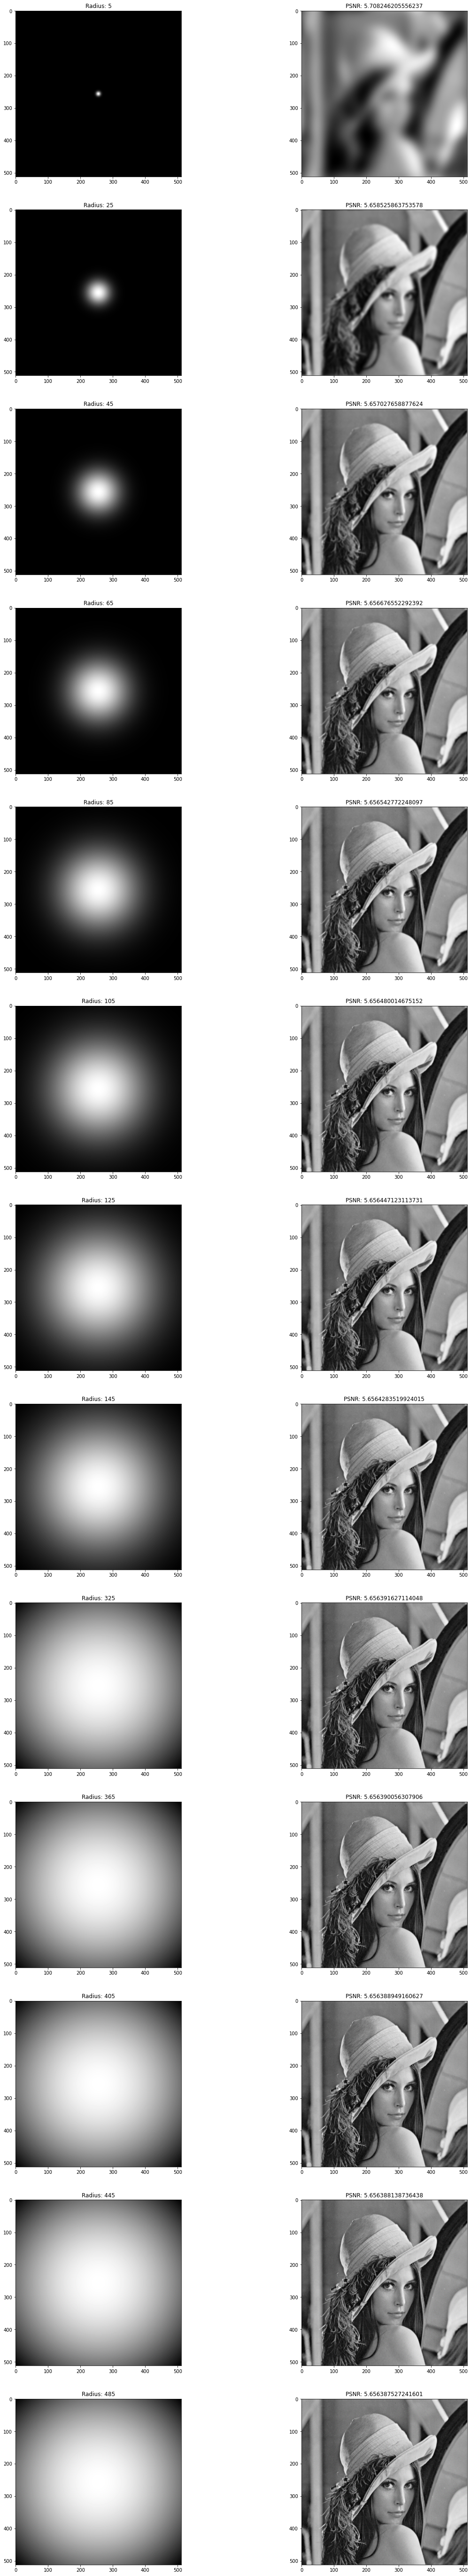

In [6]:
stp = 40
_, subplt = plt.subplots(int(lena.shape[0] / stp) + 1, 2, figsize=(20, 100))
for i in range(5, lena.shape[0], stp):
    index = int(i / stp)
    midIndex = np.ceil(int(lena.shape[0]) / stp / 2)
    radius = i
    if index <= midIndex:
        radius -= index * int(stp / 2)
    x = cv2.getGaussianKernel(lena.shape[0], radius)
    mask = x * x.T
    subplt[index][0].imshow(mask, cmap='gray')
    subplt[index][0].title.set_text(f"Radius: {radius}")
    mask = np.fft.fftshift(mask)
    result = np.fft.ifft2(lena_freq * mask)
    result = np.absolute(result)
    subplt[index][1].imshow(result, cmap='gray')
    subplt[index][1].title.set_text(f"PSNR: {cv2.PSNR(lena, result)}")
plt.show()

### مشاهدات و نتیجه گیری
به وضوح مشاهده می شود که با افزایش شعاع فیلتر گوسی کیفیت تصویر برای چشم انسان بهبود می یابد و این روش برخلاف روش قبلی از مسئله موجی شدن تصویر رنج نمی برد که این مورد هم باعث بهبود کیفیت تصویر نهایی می شود
اما اعداد پی اس ان ار در طول بزرگ شدن شعاع فیلتر تغییر مثبت چندانی ندارند حتی با مقایسه تصویر اول و دوم شاهد کم شدن این مقدار هستیم
این آزمایش به ما نشان داد مقدار پی اس ان ار می تواند در مواردی نتایج مطلوب را تولید نکند
برای سنجش شباهت و کیفیت تصاویر معیار، بینایی انسان است که در این مورد این تناقض به خوبی قابل مشاهده است